# Crypto Analysis

## Table of Content:
* [BitCoin Insights](#BitCoin-Insights)
* [Genesis Period Analysis](#Genesis-Period-Analysis)
* [First Halving Analysis](#First-Halving-Analysis)
* [Second Halving Analysis](#Second-Halving-Analysis)
* [Halving Overview](#Halving-Overview)
* [Futures Comparison](#Futures-Comparison)
* [Sentiment Analysis](#Sentiment-Analysis)





In [1]:
# import libraries
import pandas as pd
# set print options to the maximum
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.options.display.max_colwidth=200
# remove scientific float printing
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
np.set_printoptions(threshold=1000)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil import relativedelta
#sticky printing
from IPython.display import HTML
# import helper functions
from functions.framing import crypto_day_framing
import pytz

In [2]:
# read BTC data in this notebook with sticky print options
temp=pd.DataFrame()
# observe whole data with stickey label
df_html = temp.to_html() 
    # CSS styling 
style = """
    <style scoped>
    .dataframe-div {
      max-height: 300px;
      overflow: auto;
      position: relative;
    }

    .dataframe thead th {
      position: -webkit-sticky; /* for Safari */
      position: sticky;
      top: 0;
      background: white;
      color: black;
    }

    .dataframe thead th:first-child {
      left: 0;
      z-index: 1;
    }

    .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

    .dataframe tbody tr th {
      position: -webkit-sticky; /* for Safari */
      position: sticky;
      left: 0;
      background: white;
      color: black;
      vertical-align: top;
    }
</style>
"""
    # Concatenating to single string
df_html = style+'<div class="dataframe-div">'+df_html+"\n</div>"

    # Displaying df with sticky header and index
HTML(df_html)

""


## BitCoin Insights

In [3]:
BTC= pd.read_csv('crypto-active_1min_1nfzd/BTC_1min.csv')
temp=pd.read_csv('BTC Dailys.csv')

In [4]:
temp.head(1),temp.tail(2)

(        Time      Open      High       Low      Last   Change   %Chg    Volume
 0  5/31/2021 35226.620 37445.880 33522.660 36664.440 1440.520  4.09% 67528.000,
                                                            Time  Open  High  \
 2829                                                  7/20/2010 0.080 0.080   
 2830  Downloaded from Barchart.com as of 05-31-2021 09:23pm CDT   nan   nan   
 
        Low  Last  Change     %Chg  Volume  
 2829 0.080 0.080  -0.010  -11.11% 262.000  
 2830   nan   nan     nan      NaN     nan  )

In [5]:
BTC.head(1),BTC.tail(1)

(                  Time   Open   High    Low   Last  Volume
 0  2013-04-01 00:30:00 93.155 93.155 93.155 93.155  12.250,
                         Time      Open      High       Low      Last  Volume
 3465685  2021-05-14 23:59:00 49836.180 49836.180 49836.180 49836.180   1.834)

In [6]:
# convert Time col's data type yo datetime data type
BTC['Time']=pd.to_datetime(BTC['Time'], format='%Y-%m-%d %H:%M',errors='coerce')
# convert time zone from eastern to pacific time zone and set ambiguity term to true to pick one if the clock
# shows 2 different times after converting
BTC['Time']=BTC['Time'].dt.tz_localize('US/Eastern',ambiguous=True).dt.tz_convert('US/Pacific')
# remove unnecessary information from the time stamps
BTC['Time']=BTC['Time'].astype(str).str[:-6]
# convert from string data time back to date time data type
BTC['Time']=pd.to_datetime(BTC['Time'], format='%Y-%m-%d %H:%M',errors='coerce')
# setting time column as an index
BTC=BTC.set_index('Time')
# getting days from minute data
BTC=crypto_day_framing(BTC)
BTC=BTC.reset_index()

In [7]:
BTC.head(1),temp.head(1)

(        Time   Open   High    Low   Last  Volume
 0 2013-03-31 93.155 94.480 93.155 94.000 272.171,
         Time      Open      High       Low      Last   Change   %Chg    Volume
 0  5/31/2021 35226.620 37445.880 33522.660 36664.440 1440.520  4.09% 67528.000)

In [8]:
# drop additional columns from the barchart data
temp.drop(['Change','%Chg'],axis=1,inplace=True)
temp['Time']=pd.to_datetime(temp['Time'], format='%m/%d/%Y',errors='coerce')

In [9]:
# concatenation between the 2 data frames
BTC_days=pd.concat([temp,BTC])
# sort the daily data
BTC_days=BTC_days.sort_values('Time',ascending=False)
BTC_days.head()

,Time,Open,High,Low,Last,Volume
0,2021-05-31,35226.620,37445.880,33522.660,36664.440,67528.000
1,2021-05-28,38484.560,39137.250,35186.970,35223.920,93865.000
2,2021-05-27,38726.310,40316.050,37208.990,38465.160,62221.000
3,2021-05-26,37645.400,40771.850,37512.320,38707.900,79034.000
4,2021-05-25,39003.090,39801.040,36592.220,37646.580,69100.000


In [10]:
BTC_days.tail()

,Time,Open,High,Low,Last,Volume
2826,2010-07-23,0.060,0.060,0.060,0.060,2403.000
2827,2010-07-22,0.060,0.060,0.060,0.060,2160.000
2828,2010-07-21,0.070,0.070,0.070,0.070,575.000
2829,2010-07-20,0.080,0.080,0.080,0.080,262.000
2830,NaT,nan,nan,nan,nan,nan


In [11]:
BTC_days=BTC_days.dropna()
# drop data with duplicted time index
BTC_days =BTC_days[~BTC_days['Time'].duplicated()]


In [12]:
BTC_days.tail()

,Time,Open,High,Low,Last,Volume
2825,2010-07-26,0.050,0.050,0.050,0.050,877.000
2826,2010-07-23,0.060,0.060,0.060,0.060,2403.000
2827,2010-07-22,0.060,0.060,0.060,0.060,2160.000
2828,2010-07-21,0.070,0.070,0.070,0.070,575.000
2829,2010-07-20,0.080,0.080,0.080,0.080,262.000


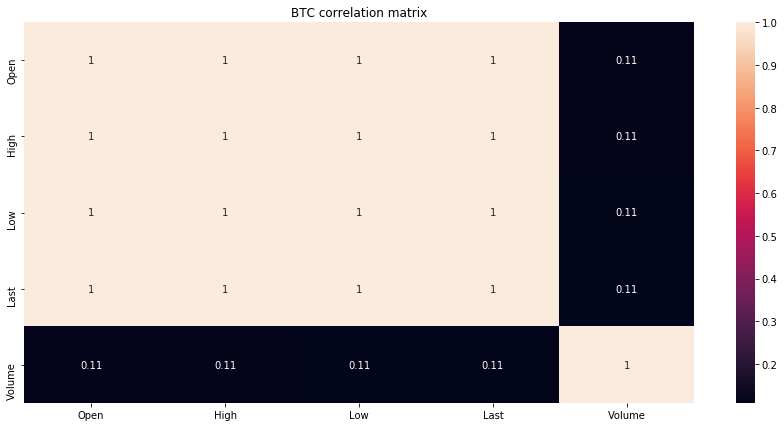

In [13]:
plt.figure(figsize=(15,7))
corrMatrix = BTC_days.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('BTC correlation matrix');
plt.show()

> both pairwise of OHLC variables have a perfect positive correlation of value 1, hence they move in the same direction together


> there is a positive weak correlation between Volumn column and for each OHLC column.

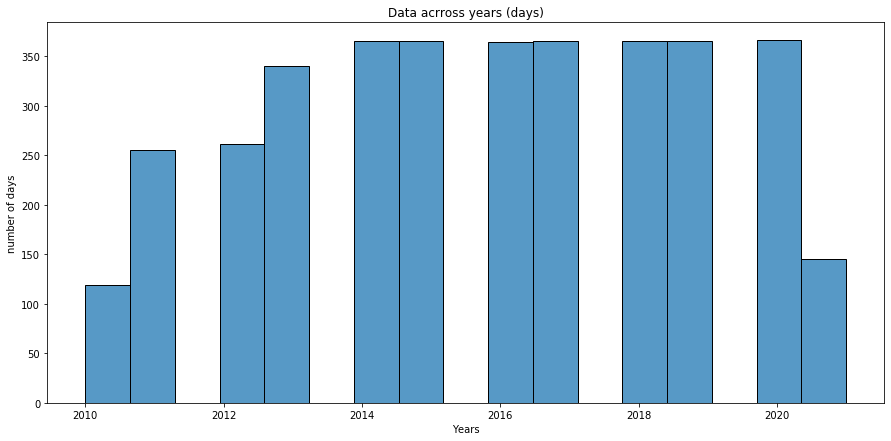

In [14]:
BTC_days['Years']=BTC_days['Time'].dt.year
plt.figure(figsize=(15,7))
sns.histplot(data=BTC_days, x="Years");
plt.ylabel('number of days');
plt.title('Data acrross years (days)');

###### missing days between  	2010-07-20 & 2010-09-13 

In [15]:
date_range=pd.date_range( '2010-07-20','2021-05-31', freq='D')
date_range_df=pd.DataFrame(date_range,columns=['Time'])
BTC_missing_days=date_range_df.Time[~date_range_df.Time.isin(BTC_days.Time)]
BTC_missing_days.to_csv('BTC_missing_days.csv')

In [16]:
# date of the maximum open value 
BTC_days[BTC_days['Open']==BTC_days.Open.max()].Open

33   63181.690
Name: Open, dtype: float64

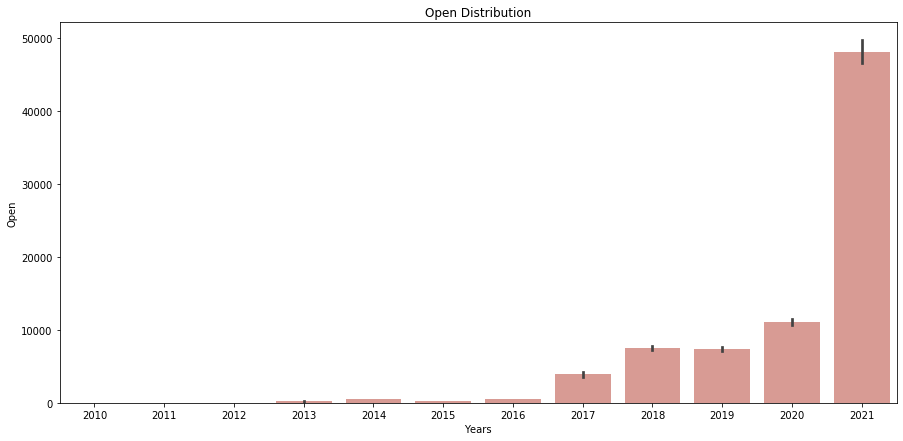

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x=BTC_days['Years'], y="Open", data=BTC_days,color="salmon", saturation=.5)
plt.title('Open Distribution');

In [18]:
BTC_days[BTC_days['Last']==BTC_days.Last.max()].Last

32   63409.480
Name: Last, dtype: float64

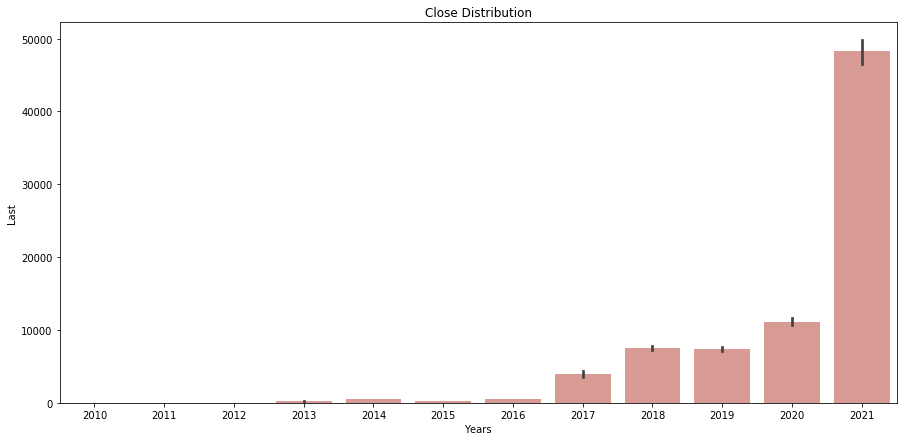

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(x=BTC_days['Years'], y="Last", data=BTC_days,color="salmon", saturation=.5)
plt.title('Close Distribution');

In [20]:
BTC_days[BTC_days['High']==BTC_days.High.max()].High

33   64789.270
Name: High, dtype: float64

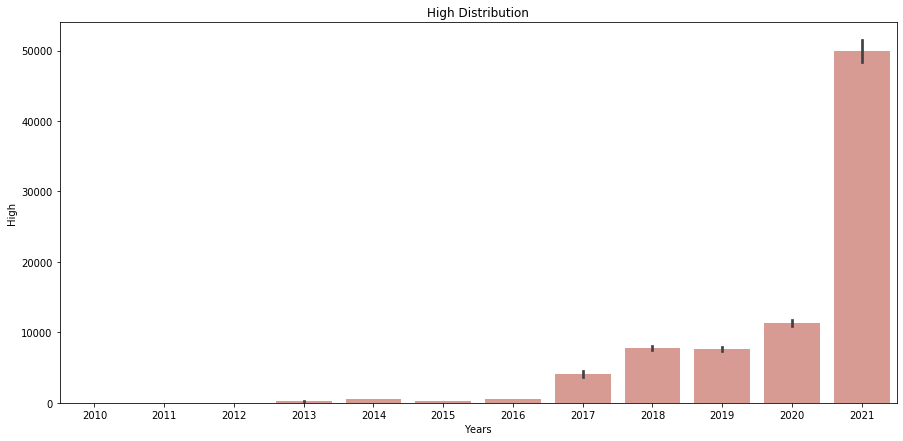

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(x=BTC_days['Years'], y="High", data=BTC_days,color="salmon", saturation=.5)
plt.title('High Distribution');

In [22]:
BTC_days[BTC_days['Low']==BTC_days.Low.max()].Low

32   62032.350
Name: Low, dtype: float64

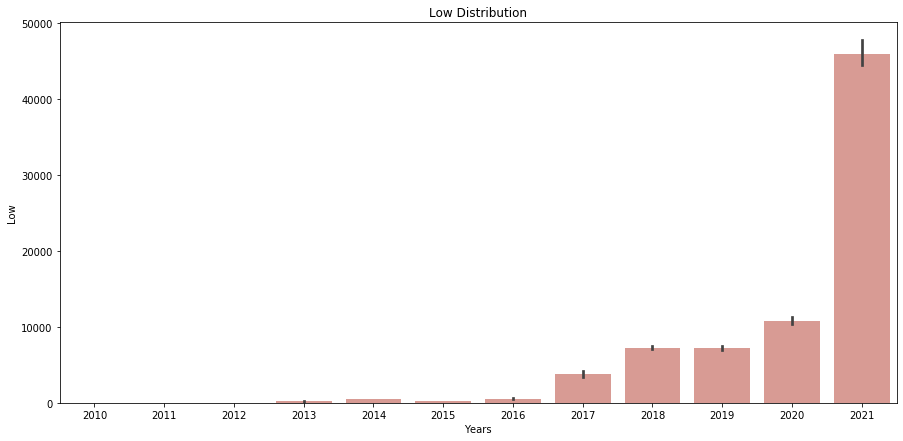

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(x=BTC_days['Years'], y="Low", data=BTC_days,color="salmon", saturation=.5)
plt.title('Low Distribution');

In [24]:
'''
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="Native Plotly rendering in Dash"
)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph", figure=fig),
])

app.run_server(debug=False)
'''


'\nimport dash\nimport dash_core_components as dcc\nimport dash_html_components as html\nimport plotly.graph_objects as go\n\nfig = go.Figure(\n    data=[go.Bar(y=[2, 1, 3])],\n    layout_title_text="Native Plotly rendering in Dash"\n)\n\napp = dash.Dash(__name__)\n\napp.layout = html.Div([\n    dcc.Graph(id="graph", figure=fig),\n])\n\napp.run_server(debug=False)\n'

In [25]:
#plt.figure(figsize=(20,10))
#sns.lineplot(data=BTC_days[BTC_days.columns.difference(['Volume','Time'])], palette="tab10", linewidth=2.5);

In [26]:
BTC_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 2829
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    3675 non-null   datetime64[ns]
 1   Open    3675 non-null   float64       
 2   High    3675 non-null   float64       
 3   Low     3675 non-null   float64       
 4   Last    3675 non-null   float64       
 5   Volume  3675 non-null   float64       
 6   Years   3675 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 309.7 KB


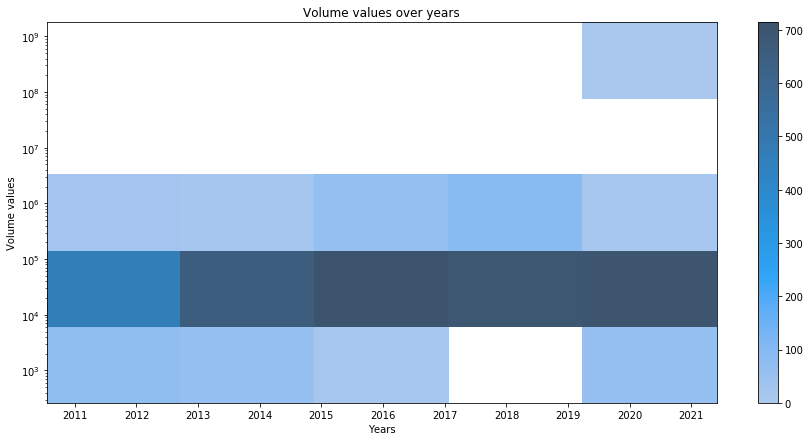

In [27]:
plt.figure(figsize=(15,7))
sns.histplot(
    BTC_days, x="Time", y="Volume",
    bins=5,  log_scale=(False, True),
    cbar=True,
);
plt.title('Volume values over years');
plt.xlabel('Years');
plt.ylabel('Volume values');

## Bitcoin Halving

- Bitcoin Halving

After every 210,000 blocks mined, or roughly every four years, the block reward given to Bitcoin miners for processing transactions is cut in half. This cuts in half the rate at which new Bitcoin is released into circulation. This is Bitcoin's way of using a synthetic form of inflation that halves every four years until all Bitcoin is released and is in circulation.

| Halving         | Date                 | Mined in period |
| :-------------  | :----------:         | -----------:    |
|  Genesis block  | 3 January 2009       | 10,500,00       |
|  Halving 1      | 28 November 2012     | 5,250,000       |
|  Halving 2      | 9 July 2016          | 5,250,000       |
|  Halving 3      | 11 May 2020          | 1,312,500       |


https://www.investopedia.com/bitcoin-halving-4843769

In [28]:
# prepare time slices
BTC_days=BTC_days.set_index('Time')
# we don't have data from jan 2009 , so we are starting from the fist day we have( 20 july 2010)
Genesis=BTC_days.loc['2012-11-28':'2010-07-20']
firstHalving=BTC_days.loc['2016-07-09':'2012-11-28']
secondHalving=BTC_days.loc['2020-05-11':'2016-07-09']
BTC_days=BTC_days.reset_index()

# Genesis Period Analysis

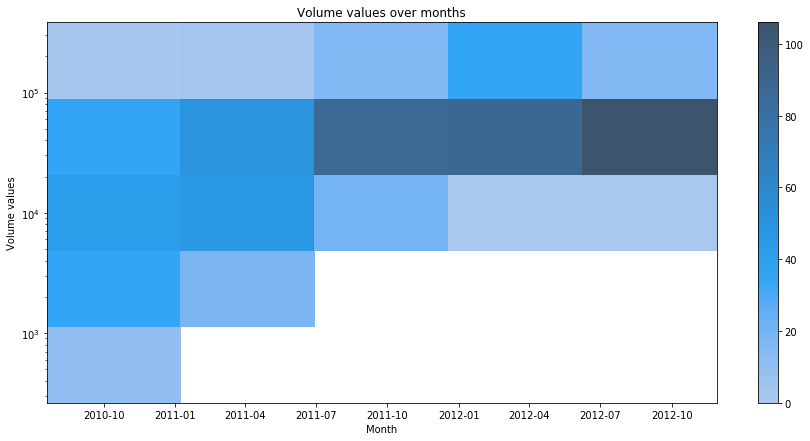

In [29]:
plt.figure(figsize=(15,7))
sns.histplot(
    Genesis, x="Time", y="Volume",
    bins=5,  log_scale=(False, True),
    cbar=True,
);
plt.title('Volume values over months');
plt.xlabel('Month');
plt.ylabel('Volume values');

In [30]:
# calculate the daily return in second halving period
Daily_ROI_percent=((Genesis['Last'].shift(-1)-Genesis['Last'])/Genesis['Last'])*100
Genesis.insert(5,'Daily_ROI%',Daily_ROI_percent)
Genesis.head()

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2012-11-28,12.250,12.250,12.250,12.250,37385.000,-1.469,2012
2012-11-27,12.070,12.070,12.070,12.070,42523.000,2.237,2012
2012-11-26,12.340,12.340,12.340,12.340,42346.000,-0.729,2012
2012-11-23,12.250,12.250,12.250,12.250,23457.000,-1.796,2012
2012-11-22,12.030,12.030,12.030,12.030,72828.000,-2.826,2012


##### The maximum daily return:

In [31]:

Genesis[Genesis['Daily_ROI%']==Genesis['Daily_ROI%'].max()]

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2011-10-17,2.850,2.850,2.850,2.850,208677.000,40.351,2011


##### The minimum daily return:

In [32]:
Genesis[Genesis['Daily_ROI%']==Genesis['Daily_ROI%'].min()]

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2011-02-01,0.740,0.740,0.740,0.740,31563.000,-31.081,2011


# First Halving Analysis

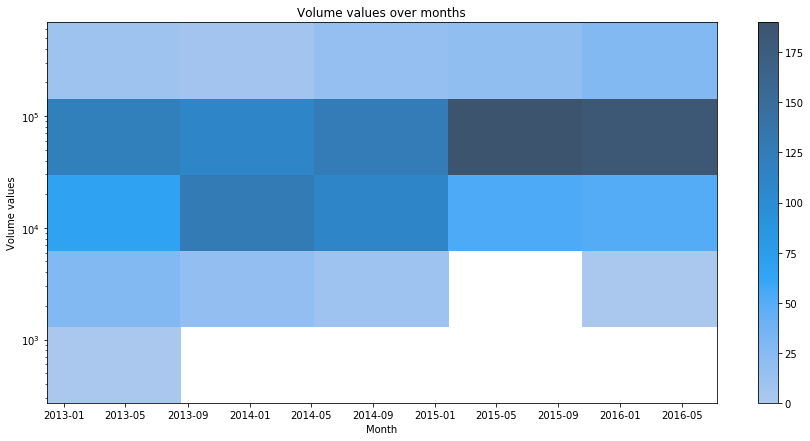

In [33]:
plt.figure(figsize=(15,7))
sns.histplot(
    firstHalving, x="Time", y="Volume",
    bins=5,  log_scale=(False, True),
    cbar=True,
);
plt.title('Volume values over months');
plt.xlabel('Month');
plt.ylabel('Volume values');

### Q. How many days between halving point and the maximum open value before the next halving point?

In [34]:

# obtain the row which has the maximum open value in the first halving data frame.
firstHalving[firstHalving['Open']==firstHalving.Open.max()]


,Open,High,Low,Last,Volume,Years
Time,,,,,,
2013-11-30,1145.320,1155.200,995.720,1078.000,20034.266,2013


In [35]:
# how many days between in the first halving period that reaches the maximum open value
d1=datetime(2013,4,1)
d2=datetime(2013,11,30)
diff=relativedelta.relativedelta(d2,d1)
print('It has been {} months {} days till we reach the maximum open value in the first halving period'.format(diff.months, diff.days))

It has been 7 months 29 days till we reach the maximum open value in the first halving period


### Q. what is the percentage of increase in price from halving point till the highest point?

In [36]:
firstHalving.Open[0]

657.85

In [37]:
firstHalving.Open.max()

1145.32

In [38]:
print('\nFirst Halving increase:\n')
f_increase=((firstHalving.Open.max()-firstHalving.Open[0])/firstHalving.Open[0])*100
s_increase=((secondHalving.Open.max()-secondHalving.Open[0])/secondHalving.Open[0])*100
print('The stock price has witnessed a {} % increase.'.format(f_increase.round()))


First Halving increase:

The stock price has witnessed a 74.0 % increase.


### Q. What is percentage of daily return in havling periods?

In [39]:
# calculate the daily return in first halving period
Daily_ROI_percent=((firstHalving['Last'].shift(-1)-firstHalving['Last'])/firstHalving['Last'])*100
firstHalving.insert(5,'Daily_ROI%',Daily_ROI_percent)
firstHalving.head()

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2016-07-09,657.850,664.000,620.000,644.000,100268.829,0.562,2016
2016-07-08,644.240,665.580,635.260,647.620,72340.000,-1.379,2016
2016-07-07,639.330,649.680,610.100,638.690,136498.116,0.100,2016
2016-07-06,672.000,682.000,625.100,639.330,93336.303,5.110,2016
2016-07-05,676.660,682.900,655.300,672.000,47249.092,-0.196,2016


##### The maximum daily return:

In [40]:
firstHalving[firstHalving['Daily_ROI%']==firstHalving['Daily_ROI%'].max()]

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2013-12-06,985.010,1015.950,538.000,572.000,108786.416,72.203,2013


##### The minimum daily return:

In [41]:
firstHalving[firstHalving['Daily_ROI%']==firstHalving['Daily_ROI%'].min()]

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2013-04-18,92.493,132.870,89.100,125.260,39279.130,-26.142,2013


# Second Halving Analysis

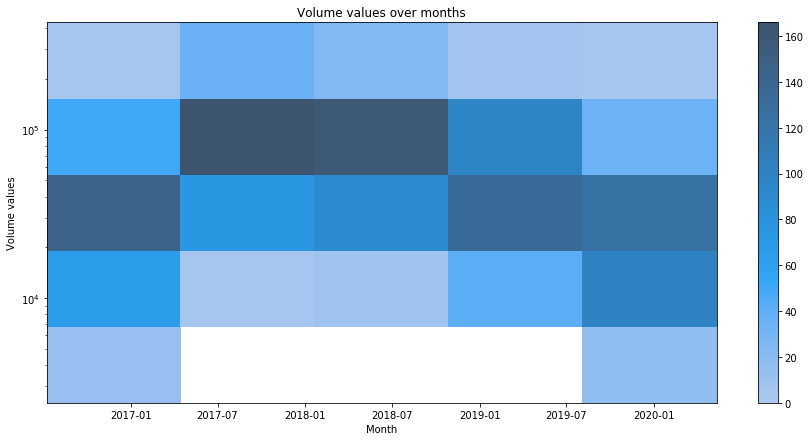

In [42]:
plt.figure(figsize=(15,7))
sns.histplot(
    secondHalving, x="Time", y="Volume",
    bins=5,  log_scale=(False, True),
    cbar=True,
);
plt.title('Volume values over months');
plt.xlabel('Month');
plt.ylabel('Volume values');

### Q. How many days between halving point and the maximum open value before the next halving point?

In [43]:
# obtain the row which has the maximum open value in the second halving data frame.
secondHalving[secondHalving['Open']==secondHalving.Open.max()]

,Open,High,Low,Last,Volume,Years
Time,,,,,,
2017-12-17,19579.000,19891.000,18010.000,18579.000,154741.355,2017


In [44]:
d1=datetime(2016,7,9)
d2=datetime(2017,12,17)
diff=relativedelta.relativedelta(d2,d1)
print('\nIt has been {} years {} months {} days till we reach the maximum open value in the second halving period\n'.format(diff.years, diff.months, diff.days))


It has been 1 years 5 months 8 days till we reach the maximum open value in the second halving period



### Q. what is the percentage of increase in price from halving point till the highest point?

In [45]:
secondHalving.Open[0]

9996.06

In [46]:
secondHalving.Open.max()

19579.0

In [47]:

s_increase=((secondHalving.Open.max()-secondHalving.Open[0])/secondHalving.Open[0])*100
print('\n--------------------------------------------------------------')
print('\nSecond Halving increase: \n')
print('The stock price witnessed a {} % increase.'.format(s_increase.round()))


--------------------------------------------------------------

Second Halving increase: 

The stock price witnessed a 96.0 % increase.


### Q. What is percentage of daily return in havling periods?

In [48]:
# calculate the daily return in second halving period
Daily_ROI_percent=((secondHalving['Last'].shift(-1)-secondHalving['Last'])/secondHalving['Last'])*100
secondHalving.insert(5,'Daily_ROI%',Daily_ROI_percent)
secondHalving.head()

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2020-05-11,9996.060,10013.450,8201.240,8638.110,126807.000,0.514,2020
2020-05-10,8610.000,8900.000,8296.600,8682.500,28461.320,-0.835,2020
2020-05-09,9698.800,9787.000,8101.000,8610.000,57928.592,16.098,2020
2020-05-08,9802.240,10058.620,9736.970,9996.060,120351.000,-1.945,2020
2020-05-07,9247.680,9956.520,9055.270,9801.600,157636.000,-5.625,2020


##### The maximum daily return:

In [49]:
secondHalving[secondHalving['Daily_ROI%']==secondHalving['Daily_ROI%'].max()]

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2018-02-05,7986.600,8067.343,6000.000,6049.900,432732.062,32.005,2018


##### The minimum daily return:

In [50]:
secondHalving[secondHalving['Daily_ROI%']==secondHalving['Daily_ROI%'].min()]

,Open,High,Low,Last,Volume,Daily_ROI%,Years
Time,,,,,,,
2018-02-06,6045.800,7880.000,6039.000,7699.900,384569.962,-21.429,2018


# Halving Overview

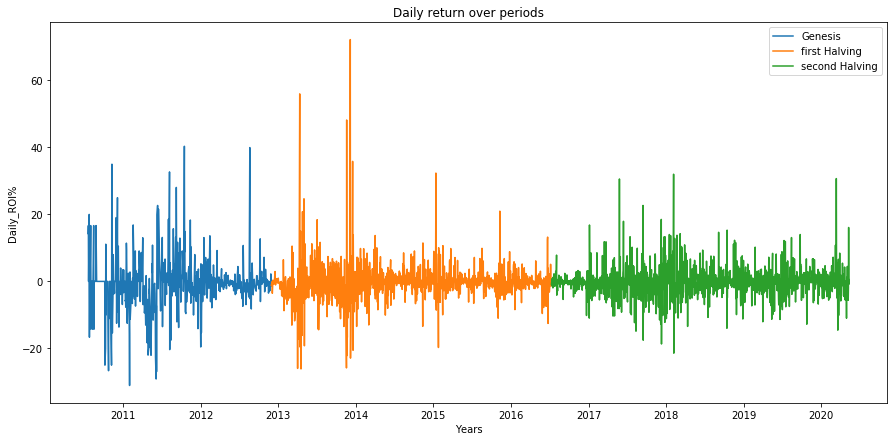

In [51]:
plt.figure(figsize=(15,7))
sns.lineplot(data=Genesis, x="Time", y="Daily_ROI%");
sns.lineplot(data=firstHalving, x="Time", y="Daily_ROI%");
sns.lineplot(data=secondHalving, x="Time", y="Daily_ROI%");

plt.title('Daily return over periods');
plt.xlabel('Years');
plt.ylabel('Daily_ROI%');
plt.legend(['Genesis','first Halving','second Halving']);

# Futures Comparison

In [52]:
futures=pd.read_csv('futures-active_adjusted_1min_8sjor/BTC_continuous_adjusted_1min.csv')

# convert Time col's data type yo datetime data type
futures['Time']=pd.to_datetime(futures['Time'], format='%Y-%m-%d %H:%M',errors='coerce')

# convert time zone from eastern to pacific time zone and set ambiguity term to true to pick one if the clock
# shows 2 different times after converting
futures['Time']=futures['Time'].dt.tz_localize('US/Eastern',ambiguous=True).dt.tz_convert('US/Pacific')

# remove unnecessary information from the time stamps
futures['Time']=futures['Time'].astype(str).str[:-6]

# convert from string data time back to date time data type
futures['Time']=pd.to_datetime(futures['Time'], format='%Y-%m-%d %H:%M',errors='coerce')


# setting time column as an index
futures=futures.set_index('Time')

# getting days from minute data
futures_days=crypto_day_framing(futures)
futures=futures.reset_index()

# sort the daily data
futures_days=futures_days.sort_values('Time',ascending=False)
futures_days=futures_days.reset_index()

In [53]:
futures_days.head()

,Time,Open,High,Low,Last,Volume
0,2021-06-04,36855.000,37415.000,35590.000,37125.000,6460
1,2021-06-03,39045.000,39560.000,36645.000,36875.000,4735
2,2021-06-02,36855.000,39050.000,36855.000,39005.000,4116
3,2021-06-01,37025.000,37460.000,35735.000,36825.000,4602
4,2021-05-31,35085.000,37985.000,35075.000,37020.000,3161


In [54]:
futures_days.tail()

,Time,Open,High,Low,Last,Volume
1261,2017-12-21,19515.290,19530.290,15385.290,16280.290,1217
1262,2017-12-20,19530.290,20880.290,18580.290,19530.290,813
1263,2017-12-19,22085.290,22085.290,18965.290,19825.290,663
1264,2017-12-18,21780.290,22300.290,21090.290,22130.290,537
1265,2017-12-17,23180.290,23180.290,20875.290,21745.290,643


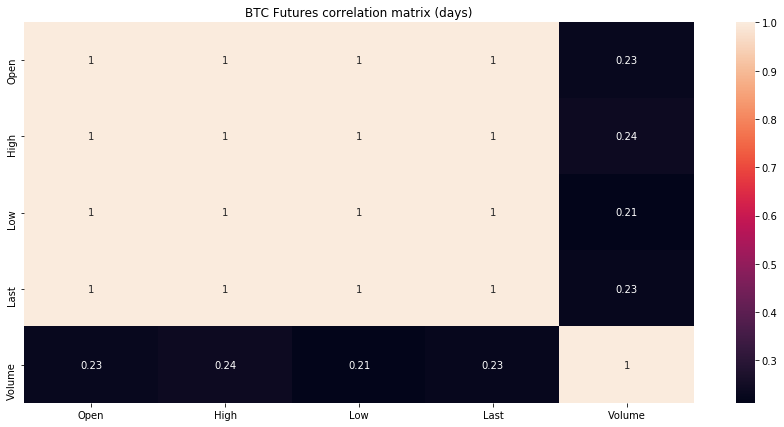

In [55]:
plt.figure(figsize=(15,7))
corrMatrix = futures_days.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('BTC Futures correlation matrix (days)');
plt.show()

> both pairwise of OHLC variables have a perfect positive correlation of value 1, hence they move in the same direction together
>> there is a very weak positive correlation between Volumn column and for each OHLC column.

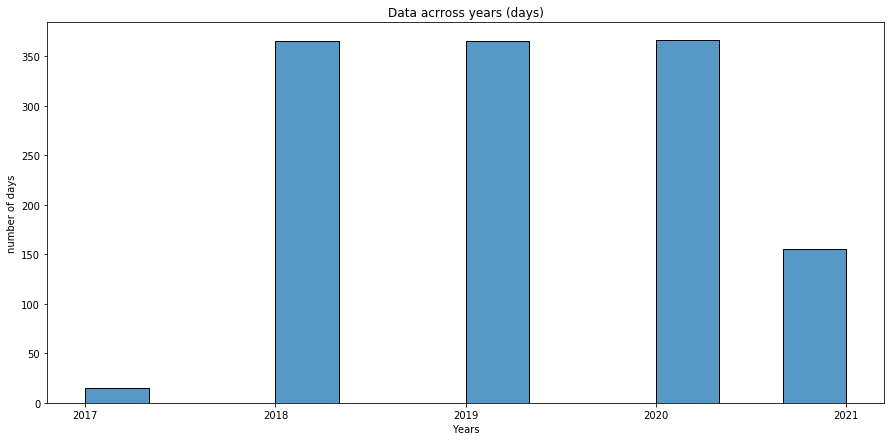

In [56]:
futures_days['Years']=futures_days['Time'].dt.year
plt.figure(figsize=(15,7))
sns.histplot(data=futures_days, x="Years");
plt.ylabel('number of days');
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.title('Data acrross years (days)');

In [57]:
date_range=pd.date_range( '2017-12-17','2021-06-04', freq='D')
date_range_df=pd.DataFrame(date_range,columns=['Time'])
BTC_Futures_missing_days=date_range_df.Time[~date_range_df.Time.isin(futures_days.Time)]
BTC_Futures_missing_days

Series([], Name: Time, dtype: datetime64[ns])

>> We have a few days in 2017 and we do not have missing days between 2017-12-17 & 2021-06-04

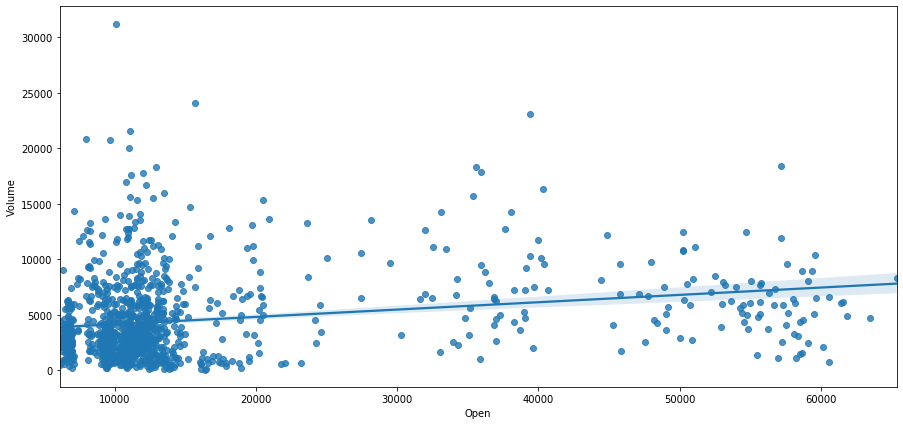

In [58]:
plt.figure(figsize=(15,7));
sns.regplot(x="Open",
y="Volume",
data=futures_days,
);
plt.show()

In [59]:
futures_days.head(1),BTC_days.head(1)

(        Time      Open      High       Low      Last  Volume  Years
 0 2021-06-04 36855.000 37415.000 35590.000 37125.000    6460   2021,
         Time      Open      High       Low      Last    Volume  Years
 0 2021-05-31 35226.620 37445.880 33522.660 36664.440 67528.000   2021)

In [60]:
futures_days.tail(1),BTC_days.tail(1)

(           Time      Open      High       Low      Last  Volume  Years
 1265 2017-12-17 23180.290 23180.290 20875.290 21745.290     643   2017,
            Time  Open  High   Low  Last  Volume  Years
 3674 2010-07-20 0.080 0.080 0.080 0.080 262.000   2010)

In [61]:
#choose days which we have in btc data frame
BTC_days=BTC_days.set_index('Time')
futures_days_dec=futures_days.loc['2017-12-17':'2021-05-31']
btc_days_dec=BTC_days.loc['2017-12-17':'2021-05-31']

# reset indices
BTC_days=BTC_days.reset_index()
futures_days=futures_days.reset_index()
futures_days_dec=futures_days_dec.reset_index()
btc_days_dec=btc_days_dec.reset_index()

In [62]:
#futures_days_dec=futures_days.loc['2021-05-31':'2017-12-17']
futures_days_dec=futures_days.loc['2017-12-17':'2021-05-31']
futures_days_dec

,index,Time,Open,High,Low,Last,Volume,Years
202,202,2020-11-14,nan,nan,nan,nan,0,2020


In [63]:
pd.merge(futures_days, BTC_days, how ='inner', on =['Time', 'Time'])

,index,Time,Open_x,High_x,Low_x,Last_x,Volume_x,Years_x,Open_y,High_y,Low_y,Last_y,Volume_y,Years_y
0,4,2021-05-31,35085.000,37985.000,35075.000,37020.000,3161,2021,35226.620,37445.880,33522.660,36664.440,67528.000,2021
1,7,2021-05-28,36865.000,37450.000,35150.000,35340.000,6595,2021,38484.560,39137.250,35186.970,35223.920,93865.000,2021
2,8,2021-05-27,38305.000,40455.000,36545.000,36955.000,4320,2021,38726.310,40316.050,37208.990,38465.160,62221.000,2021
3,9,2021-05-26,40675.000,40915.000,37290.000,38345.000,7262,2021,37645.400,40771.850,37512.320,38707.900,79034.000,2021
4,10,2021-05-25,39065.000,40840.000,36575.000,40615.000,7265,2021,39003.090,39801.040,36592.220,37646.580,69100.000,2021
5,11,2021-05-24,36240.000,39970.000,36005.000,39070.000,8883,2021,35368.630,39802.110,31257.450,39002.990,102615.000,2021
6,14,2021-05-21,40435.000,41810.000,35155.000,35300.000,9583,2021,40045.010,42088.450,35265.640,35314.600,127685.000,2021
7,15,2021-05-20,40010.000,42440.000,38215.000,40605.000,11777,2021,38396.340,42386.470,35130.930,40045.920,150098.000,2021
8,16,2021-05-19,39425.000,40815.000,30225.000,39740.000,23067,2021,43303.860,43528.450,30321.040,38344.800,291071.000,2021
9,17,2021-05-18,44875.000,45675.000,38630.000,39410.000,12167,2021,44794.510,45786.440,42518.500,43296.380,78169.000,2021


In [74]:
btc_days_dec.head()

,Time,Open,High,Low,Last,Volume,Years


In [65]:
btc_days_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    0 non-null      datetime64[ns]
 1   Open    0 non-null      float64       
 2   High    0 non-null      float64       
 3   Low     0 non-null      float64       
 4   Last    0 non-null      float64       
 5   Volume  0 non-null      float64       
 6   Years   0 non-null      int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 124.0 bytes
